In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import graphlab as gl
import matplotlib.pyplot as plt

%matplotlib inline

[INFO] This non-commercial license of GraphLab Create is assigned to gmalovichko@ucdavis.eduand will expire on August 18, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-8175 - Server binary: /home/galina/.local/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1443562083.log
[INFO] GraphLab Server Version: 1.6.1


## Load train data

In [2]:
train = gl.load_sframe('big_train.data')

train[:5]

Columns:
	CAPSULE_TEXT	str
	GENRE_NAME	str
	PRICE_RATE	int
	CATALOG_PRICE	int
	DISCOUNT_PRICE	int
	DISPFROM	int
	DISPPERIOD	int
	VALIDFROM	int
	VALIDPERIOD	float
	USABLE_DATE_MON	float
	USABLE_DATE_TUE	float
	USABLE_DATE_WED	float
	USABLE_DATE_THU	float
	USABLE_DATE_FRI	float
	USABLE_DATE_SAT	float
	USABLE_DATE_SUN	float
	USABLE_DATE_HOLIDAY	float
	USABLE_DATE_BEFORE_HOLIDAY	float
	large_area_name	str
	ken_name	str
	small_area_name	str
	REG_DATE	int
	SEX_ID	int
	AGE	int
	WITHDRAW_DATE	int
	PURCHASE_FLG	int

Rows: 5

Data:
+------------------+------------------+------------+---------------+----------------+
|   CAPSULE_TEXT   |    GENRE_NAME    | PRICE_RATE | CATALOG_PRICE | DISCOUNT_PRICE |
+------------------+------------------+------------+---------------+----------------+
|       Food       |       Food       |     50     |      3000     |      1500      |
|       Food       |       Food       |     50     |      8000     |      3980      |
|      Other       |   Other coupon   |     74     |      3835     |      980       |
| Delivery service | Delivery service |     62     |      4000     |      1500      |
| Delivery service | Delivery service |     66     |      2980     |      999       |
+------------------+------------------+------------+---------------+----------------+
+----------+------------+-----------+-------------+-----------------+-----------------+
| DISPFROM | DISPPERIOD | VALIDFROM | VALIDPERIOD | USABLE_DATE_MON | USABLE_DATE_TUE |
+----------+------------+-----------+-------------+-----------------+-----------------+
|    11    |     1      |     13    |    151.0    |       1.0       |       1.0       |
|    4     |     2      |     8     |    179.0    |       1.0       |       1.0       |
|    14    |     2      |     17    |     90.0    |       1.0       |       1.0       |
|    10    |     2      |     10    |     2.0     |       1.0       |       1.0       |
|    12    |     2      |     12    |     2.0     |       1.0       |       1.0       |
+----------+------------+-----------+-------------+-----------------+-----------------+
+-----------------+-----------------+-----------------+-----------------+-----------------+
| USABLE_DATE_WED | USABLE_DATE_THU | USABLE_DATE_FRI | USABLE_DATE_SAT | USABLE_DATE_SUN |
+-----------------+-----------------+-----------------+-----------------+-----------------+
|       1.0       |       1.0       |       0.0       |       0.0       |       1.0       |
|       1.0       |       1.0       |       1.0       |       1.0       |       1.0       |
|       1.0       |       1.0       |       1.0       |       1.0       |       1.0       |
|       1.0       |       1.0       |       1.0       |       1.0       |       1.0       |
|       1.0       |       1.0       |       1.0       |       1.0       |       1.0       |
+-----------------+-----------------+-----------------+-----------------+-----------------+
+---------------------+----------------------------+-----------------+----------+-----+
| USABLE_DATE_HOLIDAY | USABLE_DATE_BEFORE_HOLIDAY | large_area_name | ken_name | ... |
+---------------------+----------------------------+-----------------+----------+-----+
|         1.0         |            0.0             |       関東      |  埼玉県  | ... |
|         1.0         |            1.0             |       関東      |  埼玉県  | ... |
|         1.0         |            1.0             |       関西      |  大阪府  | ... |
|         1.0         |            1.0             |       関西      |  大阪府  | ... |
|         1.0         |            1.0             |       関東      |  東京都  | ... |
+---------------------+----------------------------+-----------------+----------+-----+
[5 rows x 26 columns]

# Model parameters

In [5]:
target = 'PURCHASE_FLG'

features = ['CAPSULE_TEXT',
            'GENRE_NAME',
            'PRICE_RATE',
            'CATALOG_PRICE',
            'DISCOUNT_PRICE',
            'DISPFROM',
            'DISPPERIOD',
            'VALIDFROM',
            'VALIDPERIOD',
            'USABLE_DATE_MON',
            'USABLE_DATE_TUE',
            'USABLE_DATE_WED',
            'USABLE_DATE_THU',
            'USABLE_DATE_FRI',
            'USABLE_DATE_SAT',
            'USABLE_DATE_SUN',
            'USABLE_DATE_HOLIDAY',
            'USABLE_DATE_BEFORE_HOLIDAY',
            'large_area_name',
            'ken_name',
 #           'small_area_name',
            'REG_DATE',
            'SEX_ID',
            'AGE',
            'WITHDRAW_DATE']

class_weights = 'auto'

max_iterations = 100

row_subsample = 0.8
column_subsample = 0.8

# Logistic classifier

In [14]:
# default logistic classifier
# model = gl.logistic_classifier.create(train, target = target)

# logistic classifier with 200 iterations, class weihted by prevalence
model = gl.logistic_classifier.create(train, target = target,
                                      class_weights = class_weights,
                                      features = features,
                                      max_iterations = max_iterations)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Logistic regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 1571544
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 24
PROGRESS: Number of unpacked features : 24
PROGRESS: Number of coefficients    : 110
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | 1         | 2        | 9.933004     | 0.603020          | 0.604903            |
PROGRESS: | 2         | 3        | 16.188453 

In [9]:
model.get_current_options()

{'class_weights': 'auto',
 'convergence_threshold': 0.01,
 'feature_rescaling': 1,
 'l1_penalty': 0.0,
 'l2_penalty': 0.01,
 'lbfgs_memory_level': 11,
 'max_iterations': 200,
 'solver': 'auto',
 'step_size': 1.0}

In [10]:
coefficients = model['coefficients']
coefficients['abs_value'] = coefficients['value'].apply(abs)
coefficients.sort('abs_value', ascending = False)

name,index,class,value,abs_value
(intercept),None,1,-1.19246839334,1.19246839334
CAPSULE_TEXT,Public hotel,1,-1.07338718975,1.07338718975
CAPSULE_TEXT,Vacation rental,1,-0.785247428695,0.785247428695
CAPSULE_TEXT,Lodge,1,-0.565393822611,0.565393822611
ken_name,秋田県,1,0.548656981082,0.548656981082
ken_name,鳥取県,1,0.49990555696,0.49990555696
ken_name,福島県,1,-0.472117595408,0.472117595408
ken_name,岩手県,1,0.466630138621,0.466630138621
CAPSULE_TEXT,Japanse guest house,1,-0.445847203816,0.445847203816
ken_name,香川県,1,0.445551635969,0.445551635969


In [11]:
roc = model.evaluate(train, metric = 'roc_curve')['roc_curve']
roc[:5]

threshold,fpr,tpr,p,n
0.0,4.7494339143e-05,1.25711843313e-05,159094,1494915
0.0010000000475,0.999952505661,0.999987428816,159094,1494915
0.00200000009499,0.99984948977,0.999968572039,159094,1494915
0.00300000002608,0.999747811748,0.999943429671,159094,1494915
0.00400000018999,0.999741122405,0.999937144078,159094,1494915


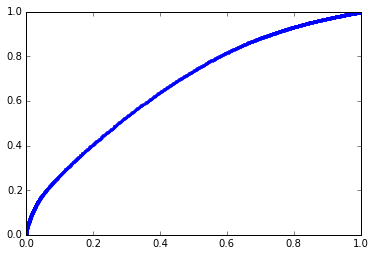

In [12]:
plt.plot(roc['fpr'], roc['tpr'], '.')

# Boosted trees

In [7]:
# default boosted trees
# model = gl.boosted_trees_classifier.create(train, target = target)

# boosted trees
model = gl.boosted_trees_classifier.create(train, target = target,
                                           class_weights = class_weights,
                                           row_subsample = row_subsample,
                                           column_subsample = column_subsample,
                                           max_iterations = max_iterations)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Boosted trees classifier:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 1571163
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 25
PROGRESS: Number of unpacked features : 25
PROGRESS: Starting Boosted Trees
PROGRESS: --------------------------------------------------------
PROGRESS:   Iter      Accuracy          Elapsed time
PROGRESS:         (training) (validation)
PROGRESS:      0   6.408e-01   6.395e-01        4.48s
PROGRESS:      1   6.473e-01   6.434e-01        9.54s
PROGRESS:      2   6.501e-01   6.488e-01       14.03s
PROGRESS:      3   6.506e-01   6.483e-01       18.58s
PROGRESS:      4   6.531e-01   6.510e-01       24.13s
PROGRESS:      5   6.541e-01   6.515e-01       29.88s
PROGRESS:      6   6.559e-01   

In [8]:
model.get_current_options()

{'class_weights': 'auto',
 'column_subsample': 0.8,
 'max_depth': 6,
 'max_iterations': 100,
 'min_child_weight': 0.1,
 'min_loss_reduction': 0.0,
 'random_seed': None,
 'row_subsample': 0.8,
 'step_size': 0.3}

In [9]:
model.get_feature_importance()

feature,count
AGE,926
REG_DATE,748
CATALOG_PRICE,488
DISPFROM,438
VALIDPERIOD,398
VALIDFROM,397
DISCOUNT_PRICE,362
PRICE_RATE,305
DISPPERIOD,152
SEX_ID,94


In [10]:
roc = model.evaluate(train, metric = 'roc_curve')['roc_curve']
roc[:5]

threshold,fpr,tpr,p,n
0.0,6.6883816123e-05,0.0,158933,1495130
0.0010000000475,0.999933116184,1.0,158933,1495130
0.00200000009499,0.999894323571,1.0,158933,1495130
0.00300000002608,0.999858875148,1.0,158933,1495130
0.00400000018999,0.99983279046,1.0,158933,1495130


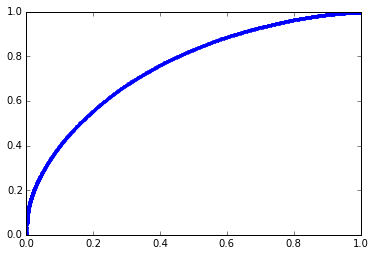

In [11]:
plt.plot(roc['fpr'], roc['tpr'], '.')

# Prediction

In [12]:
test = gl.load_sframe('big_test.data')

In [13]:
test[:5]

Columns:
	CAPSULE_TEXT	str
	GENRE_NAME	str
	PRICE_RATE	int
	CATALOG_PRICE	int
	DISCOUNT_PRICE	int
	DISPFROM	int
	DISPPERIOD	int
	VALIDFROM	int
	VALIDPERIOD	float
	USABLE_DATE_MON	float
	USABLE_DATE_TUE	float
	USABLE_DATE_WED	float
	USABLE_DATE_THU	float
	USABLE_DATE_FRI	float
	USABLE_DATE_SAT	float
	USABLE_DATE_SUN	float
	USABLE_DATE_HOLIDAY	float
	USABLE_DATE_BEFORE_HOLIDAY	float
	large_area_name	str
	ken_name	str
	small_area_name	str
	REG_DATE	int
	SEX_ID	int
	AGE	int
	WITHDRAW_DATE	int
	USER_ID_hash	str
	COUPON_ID_hash	str

Rows: 5

Data:
+--------------+------------+------------+---------------+----------------+----------+
| CAPSULE_TEXT | GENRE_NAME | PRICE_RATE | CATALOG_PRICE | DISCOUNT_PRICE | DISPFROM |
+--------------+------------+------------+---------------+----------------+----------+
|     Food     |    Food    |     52     |      5659     |      2690      |   365    |
|     Food     |    Food    |     52     |      5659     |      2690      |   365    |
|     Food     |    Food    |     52     |      5659     |      2690      |   365    |
|     Food     |    Food    |     52     |      5659     |      2690      |   365    |
|     Food     |    Food    |     52     |      5659     |      2690      |   365    |
+--------------+------------+------------+---------------+----------------+----------+
+------------+-----------+-------------+-----------------+-----------------+-----------------+
| DISPPERIOD | VALIDFROM | VALIDPERIOD | USABLE_DATE_MON | USABLE_DATE_TUE | USABLE_DATE_WED |
+------------+-----------+-------------+-----------------+-----------------+-----------------+
|     4      |    370    |    118.0    |       1.0       |       1.0       |       1.0       |
|     4      |    370    |    118.0    |       1.0       |       1.0       |       1.0       |
|     4      |    370    |    118.0    |       1.0       |       1.0       |       1.0       |
|     4      |    370    |    118.0    |       1.0       |       1.0       |       1.0       |
|     4      |    370    |    118.0    |       1.0       |       1.0       |       1.0       |
+------------+-----------+-------------+-----------------+-----------------+-----------------+
+-----------------+-----------------+-----------------+-----------------+---------------------+
| USABLE_DATE_THU | USABLE_DATE_FRI | USABLE_DATE_SAT | USABLE_DATE_SUN | USABLE_DATE_HOLIDAY |
+-----------------+-----------------+-----------------+-----------------+---------------------+
|       1.0       |       1.0       |       1.0       |       1.0       |         1.0         |
|       1.0       |       1.0       |       1.0       |       1.0       |         1.0         |
|       1.0       |       1.0       |       1.0       |       1.0       |         1.0         |
|       1.0       |       1.0       |       1.0       |       1.0       |         1.0         |
|       1.0       |       1.0       |       1.0       |       1.0       |         1.0         |
+-----------------+-----------------+-----------------+-----------------+---------------------+
+----------------------------+-----------------+----------+-----+
| USABLE_DATE_BEFORE_HOLIDAY | large_area_name | ken_name | ... |
+----------------------------+-----------------+----------+-----+
|            1.0             |       関西      |  大阪府  | ... |
|            1.0             |       関西      |  大阪府  | ... |
|            1.0             |       関西      |  大阪府  | ... |
|            1.0             |       関西      |  大阪府  | ... |
|            1.0             |       関西      |  大阪府  | ... |
+----------------------------+-----------------+----------+-----+
[5 rows x 27 columns]

In [14]:
probabilities = model.predict(test, output_type = 'probability')

In [15]:
predictions = gl.SFrame({'USER_ID_hash'   : test['USER_ID_hash'],
                         'COUPON_ID_hash' : test['COUPON_ID_hash'],
                         'probability'    : probabilities})

predictions = predictions.to_dataframe()

In [16]:
predictions = predictions[ ['USER_ID_hash', 'COUPON_ID_hash', 'probability'] ]
predictions = predictions.sort(['USER_ID_hash', 'probability'], ascending = [True, False])
predictions.head(11)

,USER_ID_hash,COUPON_ID_hash,probability
4409943,0000b53e182165208887ba65c079fc21,3d5c0b4c9e35377c0df5e1e7efe1da42,0.738456
2534357,0000b53e182165208887ba65c079fc21,9193590f0f6d2f9ea8467cfe52295107,0.645564
1322088,0000b53e182165208887ba65c079fc21,5e47b887e154f746883013f863c3ffe1,0.642931
5096133,0000b53e182165208887ba65c079fc21,27741884a086e2864936d7ef680becc2,0.622596
6697243,0000b53e182165208887ba65c079fc21,fc5f052a1bd97696fbcab35d8d974b73,0.597080
6308402,0000b53e182165208887ba65c079fc21,81c1c7241aadbb323b38689a64fbc83a,0.584226
5690831,0000b53e182165208887ba65c079fc21,9ce0b65cbbc6645e9ca4b4719f30a2e9,0.582921
2488611,0000b53e182165208887ba65c079fc21,ca8ea3d52ca939d6ab1b9c792baa6169,0.579268
3838118,0000b53e182165208887ba65c079fc21,42cc500acba3c79883cfd40adcd5ae96,0.574431
1367834,0000b53e182165208887ba65c079fc21,92eb7b05f6e838ac55a8c29adcbb60f1,0.538828


In [17]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7090630 entries, 4409943 to 6973370
Data columns (total 3 columns):
USER_ID_hash      object
COUPON_ID_hash    object
probability       float64
dtypes: float64(1), object(2)
memory usage: 216.4+ MB


In [18]:
predictions = predictions.groupby('USER_ID_hash').head(10)

In [19]:
predictions

,USER_ID_hash,COUPON_ID_hash,probability
4409943,0000b53e182165208887ba65c079fc21,3d5c0b4c9e35377c0df5e1e7efe1da42,0.738456
2534357,0000b53e182165208887ba65c079fc21,9193590f0f6d2f9ea8467cfe52295107,0.645564
1322088,0000b53e182165208887ba65c079fc21,5e47b887e154f746883013f863c3ffe1,0.642931
5096133,0000b53e182165208887ba65c079fc21,27741884a086e2864936d7ef680becc2,0.622596
6697243,0000b53e182165208887ba65c079fc21,fc5f052a1bd97696fbcab35d8d974b73,0.597080
6308402,0000b53e182165208887ba65c079fc21,81c1c7241aadbb323b38689a64fbc83a,0.584226
5690831,0000b53e182165208887ba65c079fc21,9ce0b65cbbc6645e9ca4b4719f30a2e9,0.582921
2488611,0000b53e182165208887ba65c079fc21,ca8ea3d52ca939d6ab1b9c792baa6169,0.579268
3838118,0000b53e182165208887ba65c079fc21,42cc500acba3c79883cfd40adcd5ae96,0.574431
1367834,0000b53e182165208887ba65c079fc21,92eb7b05f6e838ac55a8c29adcbb60f1,0.538828


In [20]:
predictions.drop('probability', axis = 1, inplace = True)

In [21]:
submission = predictions.groupby('USER_ID_hash')['COUPON_ID_hash'].apply( lambda x : ' '.join(x))
submission = submission.reset_index().rename(columns = {'COUPON_ID_hash' : 'PURCHASED_COUPONS'})
submission = submission.rename(columns = {'COUPON_ID_hash' : 'PURCHASED_COUPONS'})
submission.head()

,USER_ID_hash,PURCHASED_COUPONS
0,0000b53e182165208887ba65c079fc21,3d5c0b4c9e35377c0df5e1e7efe1da42 9193590f0f6d2...
1,00035b86e6884589ec8d28fbf2fe7757,5e47b887e154f746883013f863c3ffe1 ca8ea3d52ca93...
2,0005b1068d5f2b8f2a7c978fcfe1ca06,3d5c0b4c9e35377c0df5e1e7efe1da42 81c1c7241aadb...
3,000cc06982785a19e2a2fdb40b1c9d59,3d5c0b4c9e35377c0df5e1e7efe1da42 27741884a086e...
4,0013518e41c416cd6a181d277dd8ca0b,fc5f052a1bd97696fbcab35d8d974b73 5e47b887e154f...


In [22]:
# submission.to_csv('sub_logreg_gl.csv', index = False)
# submission.to_csv('sub_logreg_gl_200iter_weights.csv', index = False)

submission.to_csv('sub_boosttree_gl_100iter_weights_cols0.8_rows0,8.csv', index = False)

In [23]:
model.save('model')